<a href="https://colab.research.google.com/github/junk151516/RedesNeuronales/blob/main/Trabajo_final_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo final redes neuronales









Juan Carlos Estrada Montoya

Ing. de Sistemas

Universidad de Antioquía












<div align="left">
<p><img alt="Sapiencia" height="140px" src="https://ubicua.ingeniaudea.co/pluginfile.php/32974/coursecat/description/RF_RedesNeuronales.png"

<div align="left">
<br></br>
<br></br>



<hr size=10 noshade color="#663398">
</p>

<div align="right">

<br>


**El presente material hace parte de la ruta de formación del talento especializado de SAPIENCIA**

**Los documentos que utilizaremos en la presente y proximas clases son una mezcla del trabajo de muchos profesores y académicos.**

**En caso de utilizar el presente contenido favor citarlo y brindar los créditos respectivos.**

#**Descripción trabajo final**

<p>
  1. Analizar el código paso a paso y entenderlo y realizar una breve explicación de como funciona.<br>
  2. Realizar módificaciones variando parámetros como la cantidad de neuronas, tipo de optimizador, funciones de activación, funciones de perdida y tamaños de entrada de la imagen.<br>
  3. A partir del entendimiento del código en el punto 1 responda las siguientes preguntas: <br>
  <ul>
    <li> ¿Cual es el objetivo de categorizar los targets o labels correspondientes a cada imagen? </li>
    <li> ¿En que me ayuda la normalización a la hora de entrenar los datos? </li>
  </ul>
  <p>
  4. Realice un informe detallando los resultados obtenidos en el punto 2. El informe debe responder las siguiente preguntas:
  <ul>
    <li> ¿Cómo variaron los resultados con el aumento o disminución de las neuronas?</li>
    <li> ¿Cómo cambia la presición del modelo propuesto, al cambiar la función de activación, que se logra observar de los resultados?</li>
    <li> ¿Cuál sería a su criterio la función de activación que se adapta al presente análisis ?</li>
    <li> ¿Cómo se comportaron los resultados de las funciones de perdidas analizadas?</li>
    <li> ¿Mejoraron los resultados al reducir o aumentar el tamaño de entrada de la imagen?</li>
    <li> ¿Cuál fue la mejor solución que logró encontrar y por qué?</li>

  </ul>

  Nota: El informe debe llevar los valores que probaron en el módelo y para lo cuál como minimo se deben analizar 4 optimizadores,4 funciones de activación, 4 funciones de perdida, 4 opciones de neuronas y tamaños de entrada de la imagen. <br>
<p>
  5. Concluir en que casos se debe utilizar los optimizadores,funciones de perdida, funciones de activación y tener en cuenta que se debe presentar una gráfica representativa de cada función de activación describiendo los rangos de la función y su comportamiento.
</p>

##**Porcentajes de calificación:**


1.   Punto 1 : 10%
2.   Punto 2 : 10%
3.   Punto 3 : 10%
4.   Punto 4 : 25%
5.   Punto 5 : 15%
6.   Sustentación : 30%




---

### Esto le permite utilizar TensorFlow en el proyecto de aprendizaje automático y
###realizar tareas como entrenar modelos de redes neuronales, inferencia y otras
###herramientas que tiene la biblioteca de tensorflow.

In [1]:
pip install tensorflow

### Aquí se instala la librería de Keras, según Platzi "se usa para crear prototipos
### rápidamente y de manera fácil, pues está pensada para que sea fácil de usar",
### por lo tanto funciona como puente a repositorios donde se alojan ejemplos de redes a usar

In [2]:
pip install keras

In [3]:
## aqui se instancia a numpy como np, para poder usar calculos numericos y el analisis de datos
import numpy as np
# se importa las capas(layers) y modelos(models) de Keras
from keras import layers, models
# La función to_categorical se utiliza para convertir etiquetas categóricas en un formato apropiado para entrenar modelos de aprendizaje profundo.
from keras.utils import to_categorical
# aqui importa el dataset mnist, que es un conjunto de datos para reconocimiento de dijitos escritos a mano
from keras.datasets import mnist
#se importa pyplot como plt para la creacion de graficos y vusualizacion de datos
import matplotlib.pyplot as plt
#se importa pandas como pd para la manipulación y análisis de datos
import pandas as pd

In [4]:
#con esta línea descargo de los datos de entrenamientos y de test de la librería mnist dichos datos estan divididos por tuplas donde cada dato se corresponde con su etiqueta
(train_data, train_labels), (test_data, test_labels) =mnist.load_data()
# Aplana las imágenes ; convierte cada imagen bidimensional en un vector unidimensional.
train_data_flattened = train_data.reshape(train_data.shape[0], -1)
#se crea un DataFrame en el que se pueden realizar diversas operaciones de análisis de datos.
train_data_df = pd.DataFrame(train_data_flattened)

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
#se muestra el arreglo de matrices que contiene los datos de entrenamiento
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
#muestra las primeras 10 filas del dataframe, se puede visualizar que tiene 783 columnas que corresponden la imagen aplanada de 28 x 28 = 784 y como la columna 0 ....
train_data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#muestra la forma y dimenciones del dataframe en este caso tiene 60.000 filas x 784 columnas, es decir 60.000 datos de entrenamiento y los 784 pixeles de cada imagen
train_data_df.shape

(60000, 784)

In [8]:
#aqui se puede apreciar que los datos de entrenamiento originales son 60.000 en matrices de 28 x 28 pixeles
train_data.shape

(60000, 28, 28)

In [9]:
#muestra la columna con etiqueta "0" de las 60.000 imagenes de entrenamiento, es como hacer referencia a solo el pixel de la esquina superior izquierda de cada imagen,
# y por como esta construido el dataset es ovio que todos o la mayoria darian cero
train_data_df[0]

0        0
1        0
2        0
3        0
4        0
        ..
59995    0
59996    0
59997    0
59998    0
59999    0
Name: 0, Length: 60000, dtype: uint8

In [10]:
#Se accede a la primera imagen o la imagen en la posición 0 del conjunto de entrenamiento, dicha expresión muestra los valores de la matriz de 28 x28 que contiene cada una,
#se puede observar que los valores van de 0 a 255 donde 0 debe representar el blanco y 255 el negro, por lo tanto la imagen contiene información en escala de grises.
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

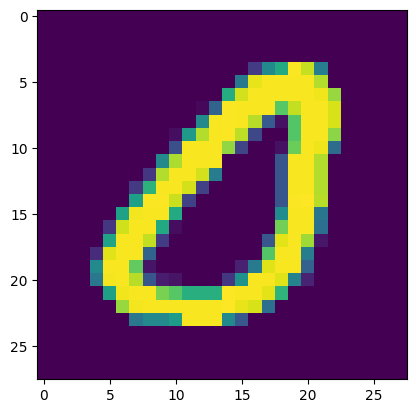

In [11]:
#Con este comando, representamos de manera visual la imagen escrita a mano en la posición 689 del conjunto de datos MNIST. Esta representación visual resulta muy útil para inspeccionar los datos del conjunto,
# especialmente cuando se trata de información visual, como imágenes de dígitos escritos a mano."
plt.imshow(train_data[689])

In [12]:
#aqui se muestra la etiquieta que corresponde a el dato de entrenamiento 689 y claramete se corresponde con la imagen anterior
train_labels[689]

0

In [13]:
#se define un modelo del tipo secuencial de Keras, que son capas apiladas unas sobre las otras
model = models.Sequential()

### se agrega una capa de entrada al modelo secuencial, al ser la primera capa se supone que es la capa de entrada
### dicha capa es densamente conectada, y cuenta con 512 neuronas
# tiene una funcion de activacion de tipo RELU (Rectified Linear Unit)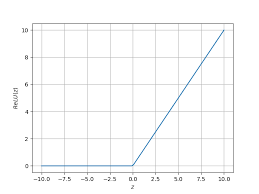
input_shape=(28*28,))) se definen 784 neuronas en la capa de entrada, que es consistente con el número de características en una imagen MNIST. Luego, la capa Dense con 512 neuronas se encuentra en la arquitectura de la red como una capa oculta que procesa las características extraídas de la capa de entrada.


In [14]:

model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))


In [15]:
#Se crea la capa de salida, es de tipo denso, por tanto esta conectada con cada una de las neuronas de la capa anterior,
#define 10 neuronas en esta capa por lo que se supone debe ser la capa de salida con la clasificacion entre 0 y 9
#la función de activación "softmax" permite que la red neuronal genere probabilidades para cada clase, lo que facilita la toma de decisiones en la clasificación de datos.
model.add(layers.Dense(10,activation='softmax'))

In [16]:
#se compila el modelo definiendo como obtimizador rmsprop  que es un algoritmo de optimización que se utilizará para ajustar los pesos del modelo durante el entrenamiento.
#segun internet " RMSprop es un algoritmo de optimización que adapta la tasa de aprendizaje de manera adaptativa durante el entrenamiento para acelerar la convergencia."
#El argumento loss especifica la función de pérdida, La pérdida representa cuán lejos están las predicciones del modelo de los valores reales.
#El argumento metrics especifica las métricas que se utilizarán para evaluar el rendimiento del modelo durante el entrenamiento.
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])

In [17]:
#en Keras se utiliza para mostrar un resumen detallado de la arquitectura del modelo
#Se muestra una tabla que enumera cada capa del modelo. En este caso, hay dos capas densamente conectadas.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# normaliza los datos de entrenamiento en valores de entre 0 y 1
x_train = train_data_df
#x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255
# normaliza los datos de testeo en valores de entre 0 y 1
x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [19]:
#muestra los datos de entrenamiento en la fila 0 ya normalizados
x_train[0]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    0.0
59998    0.0
59999    0.0
Name: 0, Length: 60000, dtype: float32

In [20]:
#convierte a categórica las etiquetas de entrenamiento y testeo con el fin de que puedan ser usadas por la red neuronal
#Por ejemplo, si tienes 10 clases (como en el caso de MNIST, donde hay dígitos del 0 al 9), la etiqueta "5" se convertirá en un vector [0, 0, 0, 0, 0, 1, 0, 0, 0, 0].
y_train = to_categorical(train_labels)
y_test  = to_categorical(test_labels )

In [21]:
#muestra la etiquieta que se corresponde con el dato en la fila 0 de los datos de entrenamiento
train_labels[0]

5

In [22]:
#muestra la etiqueta convertida a categorica en formato formato one-hot encoding.
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
#se importa callbacks de tensorflow
from tensorflow.keras.callbacks import TensorBoard

In [24]:
#se escoje una ruta para almacenar los datos del entrenamiento
tensorboardDenso = TensorBoard(log_dir ='logs/denso')

**x_train, y_train:**
Estos son los datos de entrenamiento (características y etiquetas) que se utilizarán para entrenar el modelo estos ya estan normalizados y categorizados.
**epochs=20:** son las veces que se validaran todos los datos de entrenamiento en cada pasada o epoch se ajustan los pesos de la red neuronal buscando mejorar la prediccion.
**callbacks=[tensorboardDenso] :** se define donde se generaran los datos del entrenamiento, este se edita durante el entrenamiento y se usa para hacer seguimiento del progreso.

**batch_size=128:** el tamaño del lote de datos que usa en cada iteraccion, es decir procesa 128 imagenes en un solo lote asta agorar las 60.000 imagenes de entrenamiento,Cada lote de 128 imágenes se utiliza para calcular las actualizaciones de los pesos del modelo antes de avanzar al siguiente lote.

Esta técnica de entrenamiento en lotes es común en el aprendizaje profundo y se utiliza para acelerar el proceso de entrenamiento y para aprovechar la paralelización de cálculos en hardware especializado. También puede ayudar a estabilizar y suavizar el proceso de aprendizaje.

**validation_data=(x_test, y_test):**son datos de validacion independientes de los datos de entrenamiento, y son usados durante el entrenamiento.

In [25]:
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 7s 7ms/step - loss: 0.2651 - accuracy: 0.9240 - precision: 0.9521 - val_loss: 0.1286 - val_accuracy: 0.9618 - val_precision: 0.9691
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1082 - accuracy: 0.9677 - precision: 0.9740 - val_loss: 0.1028 - val_accuracy: 0.9692 - val_precision: 0.9743
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0715 - accuracy: 0.9783 - precision: 0.9816 - val_loss: 0.0821 - val_accuracy: 0.9751 - val_precision: 0.9799
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0509 - accuracy: 0.9850 - precision: 0.9871 - val_loss: 0.0754 - val_accuracy: 0.9774 - val_precision: 0.9811
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0380 - accuracy: 0.9886 - precision: 0.9900 - val_loss: 0.0707 - val_accuracy: 0.9788 - val_precision: 0.9811
Epoch 6/20
469/469 [==============================] - 4s 9ms/step -

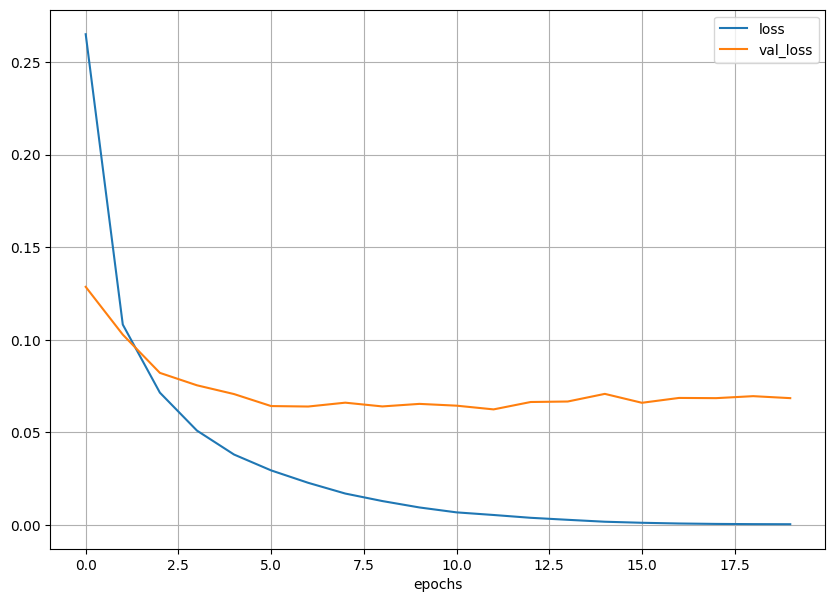

In [26]:

#Crea una grafica comparativa entre la perdida en cada epoca y val loss que es la validacion contra los datos de prueba
pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
#Agrega una cuadrícula al gráfico para facilitar la lectura de los valores.
plt.grid(True)
#Agrega la etiqueta "epochs" al eje x
plt.xlabel("epochs")
#genera la imagen del grafico
plt.show()

In [28]:
#Se utiliza para evaluar el modelo previamente entrenado con los datos de prueba,
#esta línea valida la pérdida y precisión del modelo
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9841 - precision: 0.9848


[0.0684741884469986, 0.9840999841690063, 0.9847847819328308]

### Cambio la cantidad de neuronas por 200

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 200)               157000    
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159010 (621.13 KB)
Trainable params: 159010 (621.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.3083 - accuracy: 0.9149 - precision: 0.9486 - val_loss: 0.1728 - val_accuracy: 0.9497 - val_precision: 0.9625
Epoch 2/20
469/469 [==============================] - 3s 5ms/step - loss: 0.1409 - accuracy: 0.9595 - precision: 0.9682 - val_loss: 0.1261 - val_accuracy: 0.9621 - val_precision: 0.9696
Epoch 3/20
469/469 [==================

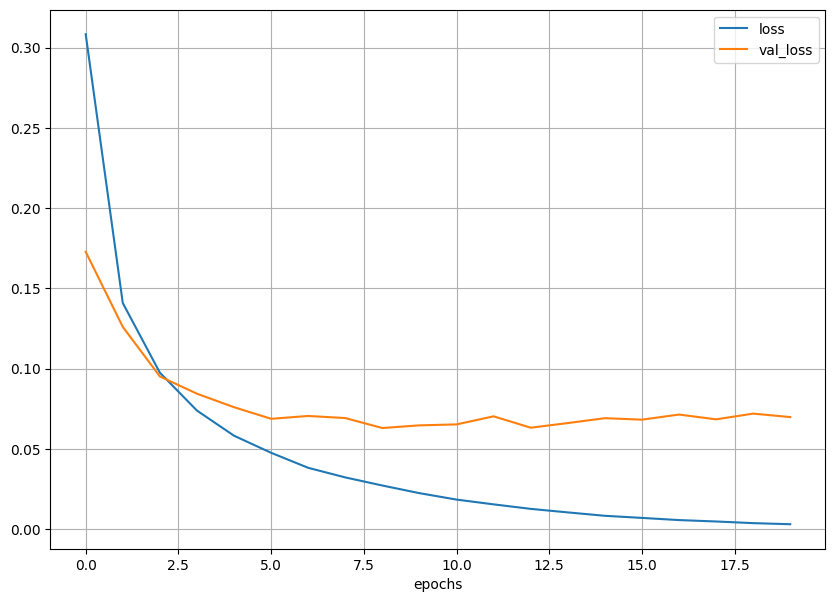

313/313 [==============================] - 1s 3ms/step - loss: 0.0699 - accuracy: 0.9811 - precision: 0.9823


[0.06987086683511734, 0.9811000227928162, 0.9822751879692078]

In [31]:
model = models.Sequential()
model.add(layers.Dense(200,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])
model.summary()
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()
model.evaluate(x_test, y_test)

### Cambio la cantidad de neuronas por 1000

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1000)              785000    
                                                                 
 dense_9 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795010 (3.03 MB)
Trainable params: 795010 (3.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2420 - accuracy: 0.9282 - precision: 0.9536 - val_loss: 0.1272 - val_accuracy: 0.9604 - val_precision: 0.9677
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0924 - accuracy: 0.9726 - precision: 0.9774 - val_loss: 0.0756 - val_accuracy: 0.9777 - val_precision: 0.9813
Epoch 3/20
469/469 [======================

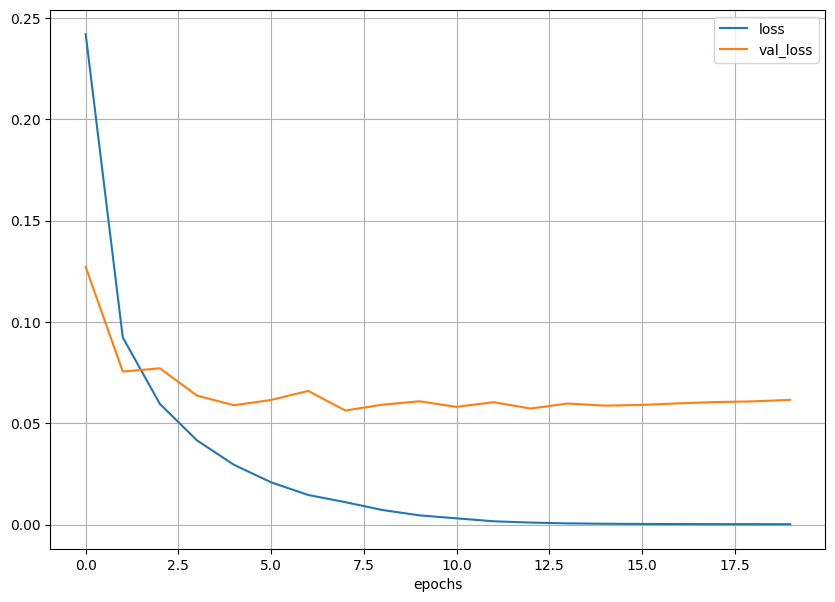

313/313 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9845 - precision: 0.9849


[0.06159785017371178, 0.984499990940094, 0.9848909378051758]

In [32]:
model = models.Sequential()
model.add(layers.Dense(2000,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])
model.summary()
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()
model.evaluate(x_test, y_test)

Cambio la cantidad de neuronas por 2000


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2000)              1570000   
                                                                 
 dense_11 (Dense)            (None, 10)                20010     
                                                                 
Total params: 1590010 (6.07 MB)
Trainable params: 1590010 (6.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 0.2269 - accuracy: 0.9318 - precision: 0.9537 - val_loss: 0.1366 - val_accuracy: 0.9575 - val_precision: 0.9651
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0822 - accuracy: 0.9750 - precision: 0.9791 - val_loss: 0.0942 - val_accuracy: 0.9687 - val_precision: 0.9730
Epoch 3/20
469/469 [====================

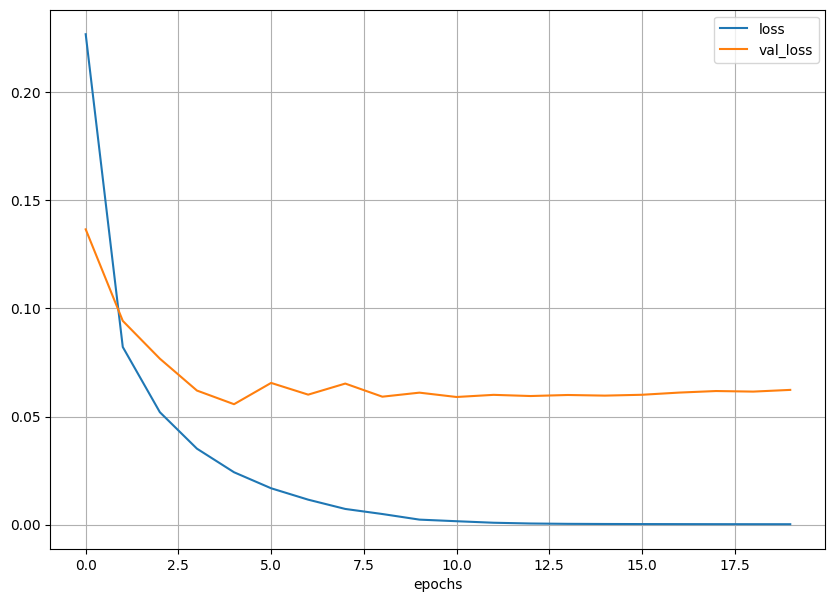

313/313 [==============================] - 1s 3ms/step - loss: 0.0623 - accuracy: 0.9847 - precision: 0.9854


[0.06231193244457245, 0.9847000241279602, 0.985389769077301]

In [33]:
model = models.Sequential()
model.add(layers.Dense(2000,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])
model.summary()
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()
model.evaluate(x_test, y_test)

##  SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam.
## Cambiando el tipo de optimizador Adam

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 1.0753 - accuracy: 0.7663 - precision: 0.9727 - val_loss: 0.5844 - val_accuracy: 0.8687 - val_precision: 0.9639
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.5143 - accuracy: 0.8736 - precision: 0.9523 - val_loss: 0.4259 - val_accuracy: 0.8926 - val_precision: 0.9530
Epoch 3/20
469/469 [======================

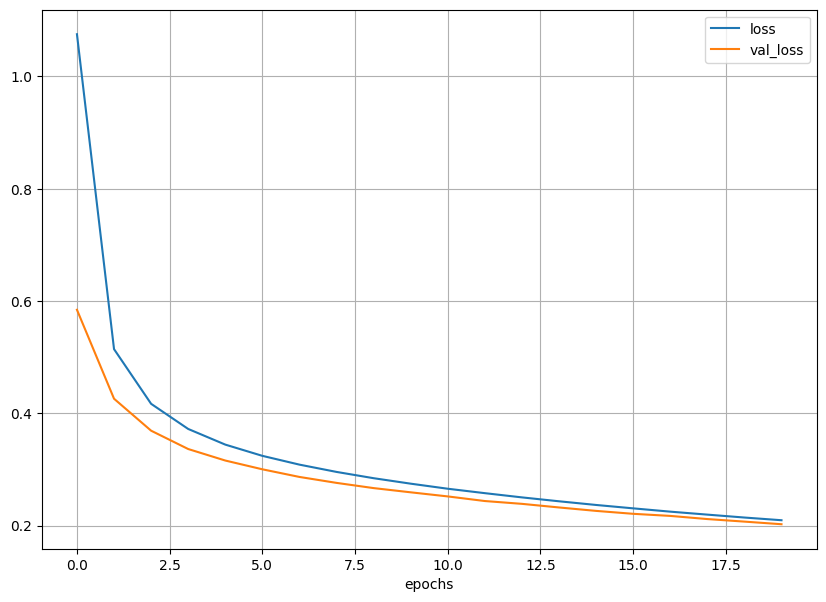

313/313 [==============================] - 1s 3ms/step - loss: 0.2023 - accuracy: 0.9425 - precision: 0.9607


[0.20234622061252594, 0.9424999952316284, 0.9606991410255432]

In [34]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])
model.summary()
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()
model.evaluate(x_test, y_test)

## Cambiando al optimizador Adam




Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 0.2686 - accuracy: 0.9237 - precision: 0.9528 - val_loss: 0.1352 - val_accuracy: 0.9608 - val_precision: 0.9686
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1081 - accuracy: 0.9688 - precision: 0.9752 - val_loss: 0.0919 - val_accuracy: 0.9732 - val_precision: 0.9777
Epoch 3/20
469/469 [======================

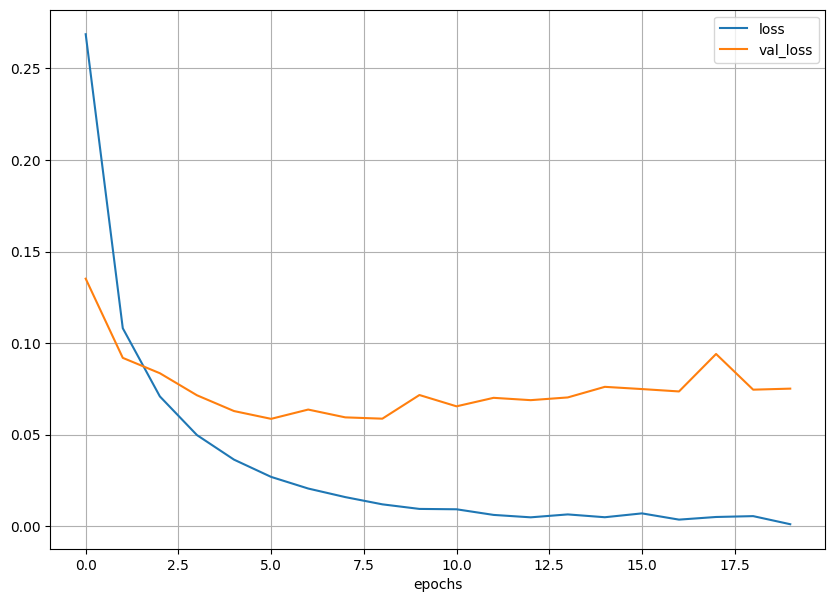

313/313 [==============================] - 1s 4ms/step - loss: 0.0751 - accuracy: 0.9830 - precision: 0.9834


[0.07513417303562164, 0.9829999804496765, 0.9833866953849792]

In [35]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])
model.summary()
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()
model.evaluate(x_test, y_test)

Cambiando al optimizador adadelta  

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               401920    
                                                                 
 dense_23 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 4s 6ms/step - loss: 2.2410 - accuracy: 0.2256 - precision: 0.0000e+00 - val_loss: 2.1602 - val_accuracy: 0.2725 - val_precision: 0.0000e+00
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 2.0932 - accuracy: 0.3305 - precision: 0.0000e+00 - val_loss: 2.0136 - val_accuracy: 0.4048 - val_precision: 0.0000e+00
Epoch 3/20
469/469 [=====

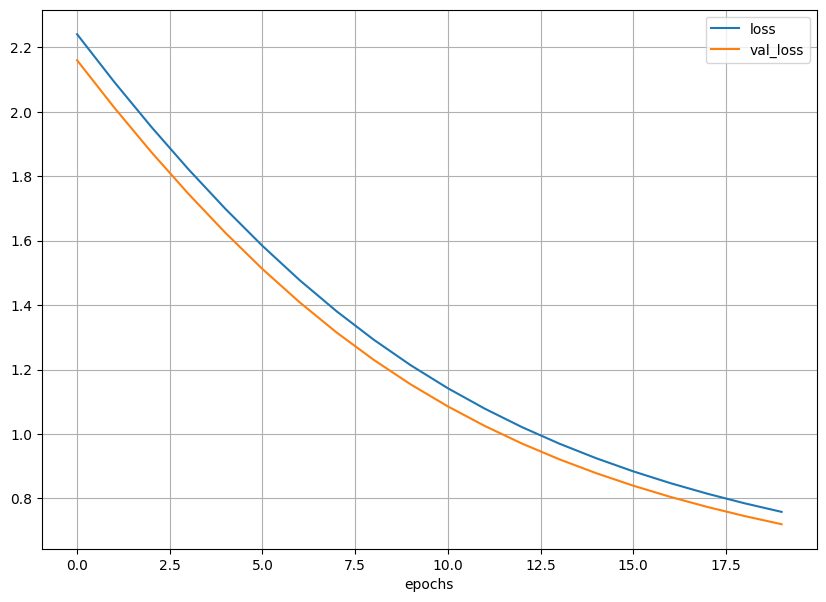

313/313 [==============================] - 1s 4ms/step - loss: 0.7198 - accuracy: 0.8622 - precision: 0.9779


[0.7197704315185547, 0.8622000217437744, 0.9778537750244141]

In [39]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])
model.summary()
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()
model.evaluate(x_test, y_test)

Adagrad

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 1.7454 - accuracy: 0.5624 - precision: 0.9972 - val_loss: 1.2648 - val_accuracy: 0.7636 - val_precision: 0.9993
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0522 - accuracy: 0.7930 - precision: 0.9897 - val_loss: 0.8529 - val_accuracy: 0.8293 - val_precision: 0.9837
Epoch 3/20
469/469 [=====================

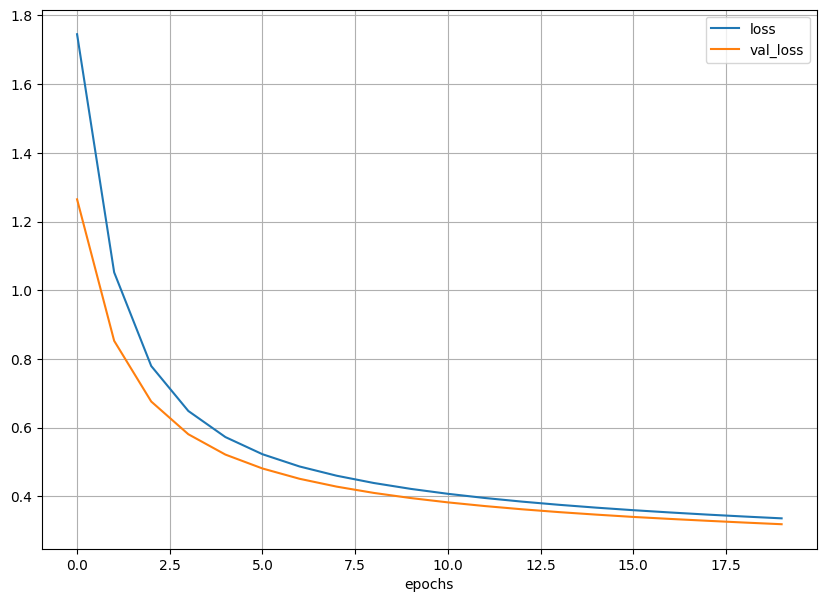

313/313 [==============================] - 1s 3ms/step - loss: 0.3191 - accuracy: 0.9150 - precision: 0.9513


[0.31905490159988403, 0.9150000214576721, 0.9512723088264465]

In [40]:
model = models.Sequential()
model.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adagrad',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision'])
model.summary()
history = model.fit(x_train, y_train, epochs=20,callbacks=[tensorboardDenso], batch_size=128, validation_data=(x_test, y_test))

pd.DataFrame({'loss': history.history['loss'],
              'val_loss': history.history['val_loss']}).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.show()
model.evaluate(x_test, y_test)